# Bose Hubbard Model

__Author: Tanausú Hernández__

We may imagine the atoms behave similarly in an optical lattice than in a potential well, but now we need to take into account the possibility of tunneling to another potential well. We will assume the potential well is deep enough and the spatial wavefunction is well localized so that we can employ the tight-binding approximation. 

In such case, after writting the many body Hamiltonian in second quantization form and assuming we only populate the lowest Bloch band we may obtain the Hubbard model.

For bosons, the Hubbard Hamiltonian in its simplest form can be written as

$$H = -J\sum_j (\hat{a}_j^\dagger\hat{a}_{j+1} + \text{h.c.}) + \frac{U}{2}\sum_j\hat{n}_j(\hat{n}_j-1),$$

where $\hat{a}_j$ is the annihilation operator at site $j$ and $\hat{n}_j=\hat{a}_j^\dagger\hat{a}_j$ is the corresponding number operator. 

To study the dynamics of the system it makes sense to choose an eigenbasis which is well characterized by the creation and annihilation operators. Thus, we will use a number occupation basis, also called Fock basis. In such case we know

$$
a_1\left|n_1, \ldots, n_M\right> = \sqrt{n_1}\left|n_1-1, \ldots, n_M\right>,\\
a^\dagger_1\left|n_1, \ldots, n_M\right> = \sqrt{n_1+1}\left|n_1+1, \ldots, n_M\right>.
$$

Notice the different  occupation numbers here are meant for the lattice sites, as we have stablished we only populate the lowest Bloch band. 

This means that, as one would expect, the annihilation operator by itself changes the particle number of the state but notice that the Hubbard Hamiltonian always conserves the number of particles, so we can write our basis with a fixed number of particles. For now we will consider periodic boundary conditions and a fixed number of particles, disregarding particle losses. 

Thus, the first step in building simulations for this Hamiltonian is to write our $N$ particle Fock basis so that we can have a simple way to then compute our Hamiltonian.


(-7.500000000000001e-08, 1.575e-06, -0.04997102104762898, 1.0499986200498872)

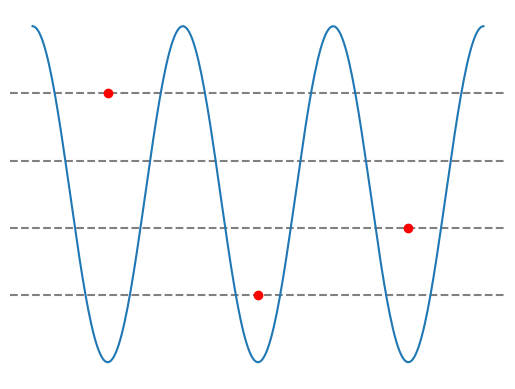

In [1]:
import numpy as np
import matplotlib.pyplot as plt

M = 3
a = 1e-6 # nm
x = np.linspace(0, M/2*a, 300)
y = np.sin(2*np.pi*(x/a+.25))**2

for i in range(4):
    plt.axhline((i+1)*.2, ls = 'dashed', color = 'grey')
plt.plot(x,y)
plt.scatter([1*a/4, 3*a/4, 5*a/4],[0.8,0.2,0.4], color = 'red', zorder = 5)
plt.axis('off')

## Construction of Fock basis

_(this section is based on https://iopscience.iop.org/article/10.1088/0143-0807/31/3/016/pdf)_

Remember that bosonic statistics allow us to have as many particles in the same state as we want, so one possible Fock state is that all particles sit in the same lattice site with the same single particle energy. For N total particles one such state would be

$$ |\Psi_1>=|N, 0,\ldots , 0> / n_j = 0, \forall j > 1.$$

Another allowed state would be one where all particles expect one are in the same lattice site:

$$ 
|\Psi_2>=|N-1, 1,\ldots , 0> / n_j = 0, \forall j > 2,\\
|\Psi_3>=|N-1, 0, 1,\ldots , 0> / n_j = 0, \forall j \notin {1,3},\\
\ldots\\
|\Psi_{1+l}>=|N-1, 0, \ldots, n_l=1,\ldots , 0> / n_j = 0, \forall j \notin {1,l}
.$$

And so on. You can keep writting possible states but you might fall into the issue of writting duplicates by following overlapping procedures. This is alright in terms of programming because you can always check if you made any duplicate states but it's not really efficient. Ideally we want to create a unique state only once. You can see how inefficient it is for a large number of states with this example:

In [2]:
%timeit basis_1 = [i for i in range(1000)]

27.7 µs ± 285 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [3]:
%timeit basis_2 = set([i for i in range(1000)] + [i for i in range(10)])

40.4 µs ± 384 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


So to only create unique states once, one has to write an algorithm that explores the configuration space with some kind of order or pattern. 

For now, let us take on a simple example and think of ways you can write a hierarchy of states so as to calculate them all.

__Exercise:__

Write all possible Fock states for $N = 2, M = 3$ by hand (6 states in total). Reorder them in at least two ways that make sense to you.

In [4]:
# Write your code here
























__Example solution:__

In [5]:
states_1 =[
    (2, 0, 0),
    (0, 2, 0),
    (0, 0, 2),
    (1, 1, 0),
    (0, 1, 1),
    (1, 0, 1),
]

states_2 =[
    (2, 0, 0),
    (1, 1, 0),
    (1, 0, 1),
    (0, 2, 0),
    (0, 1, 1),
    (0, 0, 2),
]

states_3 =[
    (0, 0, 2),
    (0, 1, 1),
    (1, 0, 1),
    (0, 2, 0),
    (1, 1, 0),
    (2, 0, 0),
]

__Exercise:__

Compute all possible Fock states for $N=2, M=3$ using loops and conditionals. Also extend it to the case $N = 3, M = 3$.

In [6]:
# Write your code here
























__Example solution:__

In [7]:
#N=2,M=3

#One way
states = []
for i in range(3):
    v = [0,0,0]
    v[i] = 2
    states.append(tuple(v))
for i in range(3):
    for j in range(i+1,3):
        v = [0,0,0]
        v[i] = 1
        v[j] = 1
        states.append(tuple(v))

print(states)

#Another way
states = []
for i in range(3):
    v = [0,0,0]
    v[i] = 2
    states.append(tuple(v))
    v[i] -= 1
    for j in range(i+1,3):
        v[j] = 1
        states.append(tuple(v))
        v[j] -= 1
            
print(states)

#And a third way
states = []
N = 2
for n_1 in range(N+1):
    for n_2 in range(N+1-n_1):
        for n_3 in range(N+1-n_2-n_1):
            v = [n_1, n_2, n_3]
            if sum(v) == N:
                states.append(tuple(v))
            
print(states)


[(2, 0, 0), (0, 2, 0), (0, 0, 2), (1, 1, 0), (1, 0, 1), (0, 1, 1)]
[(2, 0, 0), (1, 1, 0), (1, 0, 1), (0, 2, 0), (0, 1, 1), (0, 0, 2)]
[(0, 0, 2), (0, 1, 1), (0, 2, 0), (1, 0, 1), (1, 1, 0), (2, 0, 0)]


In [8]:
#N=3,M=3

#One example
states = []
for i in range(3):
    v = [0,0,0]
    v[i] = 3
    states.append(tuple(v))
for i in range(3):
    for j in range(3):
        if j != i:
            v = [0,0,0]
            v[i] = 2
            v[j] = 1
            states.append(tuple(v))
            
#There is only one possibility for this distribution of particles so one can do it by hand as a particular case
'''
for i in range(3):
    for j in range(3):
        for k in range(3):
        if j != i and k != i:
            v = [0,0,0]
            v[i] = 1
            v[j] = 1
            v[k] = 1
            states.append(tuple(v))
'''
states.append((1,1,1))

print(states)

#Other example
states = []
for i in range(3):
    v = [0,0,0]
    v[i] = 3
    states.append(tuple(v))
    v[i] -= 1
    for j in range(3):
        if j != i:
            v[j] = 1
            states.append(tuple(v))
            #as before, better to include it once
            '''
            v[i] -= 1
            for k in range(3):
                if k != j and k != i:
                    v[k] = 1
                    states.append(tuple(v))
                    v[k] -= 1
            v[i] += 1
            '''
            v[j] -= 1
states.append((1,1,1))
            
print(states)

#Final example
states = []
N = 3
for i in range(N+1):
    for j in range(N+1-i):
            for k in range(N+1-i-j):
                v = [i,j,k]
                if sum(v) == N:
                    states.append(tuple(v))
            
print(states)

[(3, 0, 0), (0, 3, 0), (0, 0, 3), (2, 1, 0), (2, 0, 1), (1, 2, 0), (0, 2, 1), (1, 0, 2), (0, 1, 2), (1, 1, 1)]
[(3, 0, 0), (2, 1, 0), (2, 0, 1), (0, 3, 0), (1, 2, 0), (0, 2, 1), (0, 0, 3), (1, 0, 2), (0, 1, 2), (1, 1, 1)]
[(0, 0, 3), (0, 1, 2), (0, 2, 1), (0, 3, 0), (1, 0, 2), (1, 1, 1), (1, 2, 0), (2, 0, 1), (2, 1, 0), (3, 0, 0)]


The solution examples given here are in fact _bad_ in the sense that they are not written for the general case of arbitrary N or M and were written without thinking on how to go from one state to the next in the order given, but basically constructed from scratch. They are not extensible in the sense that one must write extra loops for increasing number of sites. The best way to find a general algorithm is to find a path that connects the previous state with the next for a given order, so that we don't need unnecesary loops. 

First, we need to understand the order we have given to our states. One way to understand properly our ordering procedure is to give each state a "weight" based on their occupation numbers. The way you calculate said weight gives you an order. This is analogous to using the energies of a non-degenerate diagonal Hamiltonian for this basis. 

The simpler way to see a hierarchy in this case is to notice we can sort the states in lexicographic order. This is a fancy word for saying we have a total order in our set and reading the occupation numbers from left to right give us said ordering. States with more occupation to the left rank higher than those to the right. That's all you need to know.

In such case the order would go like

$$ 
|N, 0,\ldots , 0> \\
|N-1, 1,\ldots , 0>\\
\ldots\\
|N-1, 0, \ldots, 0, 1, 0, \ldots , 0> \\
\ldots\\
|N-2, 2, 0,\ldots , 0> \\
|N-2, 1, 1, 0,\ldots , 0> \\
\ldots\\
|N-2, 1, 0, \ldots, 0, 1, 0,\ldots , 0> \\
\ldots\\
|\underbrace{1, \ldots, 1}_{\sum_l n_l = N}, 0, \ldots, 0>\\
\ldots\\
|0, \ldots, 0, N>
.$$

Informally speaking, the _path_ that connects one state with the next is to substract one particle from the last non-empty site and assign all the left over particles to the next site, if there is any. If not, we go to the second to last non-empty site, substract another particle and start again. 

In other words, the proposed algorithm is:

For a given Fock state $\left|n_1, n_2, \ldots, n_M\right>$ with some $n_k \neq 0$ while $n_i = 0 \forall k < i < M$ the next ranking vector $\left|\tilde{n}_1, \tilde{n}_2, \ldots, \tilde{n}_M\right>$ can be computed by:
- $\tilde{n}_i = n_i, \forall i < k$
- $\tilde{n}_k = n_k - 1$
- $\tilde{n}_{k+1} = N - \sum_{i=1}^k \tilde{n}_i$
- $\tilde{n}_i = 0, \forall i > k+1$

This is a single loop with some conditionals. The loop should stop when we have reached state $|0,\ldots, 0, N>$.

__Exercise:__

Write the proposed algorithm as a function and calculate the Fock basis for $N=M=5$.

In [9]:
# Write your code here























__Example solution:__

In [10]:
def basis_calc(N, M):
    basis = []
    v = [0 for i in range(M)]
    v[0] = N
    basis.append(tuple(v))
    k=0
    while v[-1] < N:
        if k < M-1 and v[k] != 0:
            v[k] -= 1
            v[k+1] = N - sum(v[:k+1])
            v[k+2:] = [0 for i in range(k+2,M)]
            basis.append(tuple(v))
            k += 1
        else:
            k -= 1
            
    return basis

basis = basis_calc(5,5)
for i, state in enumerate(basis):
    print(i, state)
    
print('Size:', len(basis))

0 (5, 0, 0, 0, 0)
1 (4, 1, 0, 0, 0)
2 (4, 0, 1, 0, 0)
3 (4, 0, 0, 1, 0)
4 (4, 0, 0, 0, 1)
5 (3, 2, 0, 0, 0)
6 (3, 1, 1, 0, 0)
7 (3, 1, 0, 1, 0)
8 (3, 1, 0, 0, 1)
9 (3, 0, 2, 0, 0)
10 (3, 0, 1, 1, 0)
11 (3, 0, 1, 0, 1)
12 (3, 0, 0, 2, 0)
13 (3, 0, 0, 1, 1)
14 (3, 0, 0, 0, 2)
15 (2, 3, 0, 0, 0)
16 (2, 2, 1, 0, 0)
17 (2, 2, 0, 1, 0)
18 (2, 2, 0, 0, 1)
19 (2, 1, 2, 0, 0)
20 (2, 1, 1, 1, 0)
21 (2, 1, 1, 0, 1)
22 (2, 1, 0, 2, 0)
23 (2, 1, 0, 1, 1)
24 (2, 1, 0, 0, 2)
25 (2, 0, 3, 0, 0)
26 (2, 0, 2, 1, 0)
27 (2, 0, 2, 0, 1)
28 (2, 0, 1, 2, 0)
29 (2, 0, 1, 1, 1)
30 (2, 0, 1, 0, 2)
31 (2, 0, 0, 3, 0)
32 (2, 0, 0, 2, 1)
33 (2, 0, 0, 1, 2)
34 (2, 0, 0, 0, 3)
35 (1, 4, 0, 0, 0)
36 (1, 3, 1, 0, 0)
37 (1, 3, 0, 1, 0)
38 (1, 3, 0, 0, 1)
39 (1, 2, 2, 0, 0)
40 (1, 2, 1, 1, 0)
41 (1, 2, 1, 0, 1)
42 (1, 2, 0, 2, 0)
43 (1, 2, 0, 1, 1)
44 (1, 2, 0, 0, 2)
45 (1, 1, 3, 0, 0)
46 (1, 1, 2, 1, 0)
47 (1, 1, 2, 0, 1)
48 (1, 1, 1, 2, 0)
49 (1, 1, 1, 1, 1)
50 (1, 1, 1, 0, 2)
51 (1, 1, 0, 3, 0)
52 (1, 1, 0, 2, 1)
53 

## Computation of Hamiltonian

Now that we have our eigenbasis, it's time to define the Hamiltonian. Let us begin with the interaction term, 

$$ \hat{H}_{int} = \frac{U}{2}\sum_j \hat{n}_j (\hat{n}_j - 1) .$$

It's easy to see this Hamiltonian is diagonal with respect to the Fock states since 

$$ \hat{n}_j\left|n_1, \ldots, n_j, \ldots, n_M\right> = n_j\left|n_1, \ldots, n_j, \ldots, n_M\right>,$$

so that

$$ \hat{H}_{int}\left|n_1, \ldots, n_j, \ldots, n_M\right> = \frac{U}{2}\left(\sum_j n_j (n_j - 1)\right) \left|n_1, \ldots, n_j, \ldots, n_M\right>.$$

__Exercise:__

Calculate the interaction Hamiltonian for $U=1$ in matrix representation making use of the Fock basis function previously defined for the case $N=M=3$. Print the resulting matrix.

In [11]:
# Write your code here























__Example solution:__

In [12]:
N = M = 3


basis = basis_calc(N, M)
U = 1
H_int = np.zeros((len(basis), len(basis)))
for i, v in enumerate(basis):
    H_int[i, i] = U/2*sum([n*(n-1) for n in v])
    
print(H_int)
for v in basis:
    print(v)

[[3. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]
(3, 0, 0)
(2, 1, 0)
(2, 0, 1)
(1, 2, 0)
(1, 1, 1)
(1, 0, 2)
(0, 3, 0)
(0, 2, 1)
(0, 1, 2)
(0, 0, 3)


This is all very nice until you notice your basis grows with size $D = {(N+M-1)!}{N!(M-1)!}$ and the Hamiltonian with size $D\times D$. This means that for large systems the matrices will occupy a lot of memory, which isn't ideal. The solution to that is to work with similar objects that can avoid using memory to allocate the information about the massive amount of zeros in our matrix. In other words, sparse matrices.

__Exercise:__

Write the previous Hamiltonian using a ```scipy.sparse.dia_array``` object using the fourth construction option that appears in:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.dia_array.html

In [13]:
# Write your code here























__Example solution:__

  (0, 0)	3.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (5, 5)	1.0
  (6, 6)	3.0
  (7, 7)	1.0
  (8, 8)	1.0
  (9, 9)	3.0


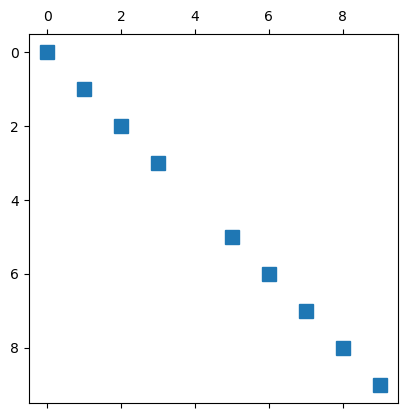

In [14]:
import scipy.sparse as sparse
N = M = 3


basis = basis_calc(N, M)
D = len(basis)
U = 1
diag = []
for i, v in enumerate(basis):
    diag.append(U/2*sum([n*(n-1) for n in v]))
H_int = sparse.dia_array((diag, 0), (D,D))
    
print(H_int)
plt.spy(H_int)

Now we must tackle the tunnelling Hamiltonian

$$\hat{H}_{0} = -J \sum_j \left(\hat{a}_j^\dagger \hat{a}_{j+1} + \hat{a}_{j+1}^\dagger \hat{a}_{j}\right),$$ 

which is obviously not diagonal but the logic to compute it is quite straightforward. Again, we know how the creation/annihilation operators behave with respect to Fock states so

$$ \hat{H}_{0}\left|n_1, \ldots, n_j, \ldots, n_M\right> = -J\sum_j\left( \sqrt{n_j+1}\sqrt{n_{j+1}} \left|n_1, \ldots, n_j+1, n_{j+1}-1, \ldots, n_M\right> + \sqrt{n_j}\sqrt{n_{j+1}+1} \left|n_1, \ldots, n_j-1, n_{j+1}+1, \ldots, n_M\right>\right) .$$

However, now we need to find where in the Fock basis these new Fock states are so that we can populate the proper matrix elements. For that we need some kind of indexing of our basis to know where goes what. One might be tempted to simply compare the resulting states with the ones in the basis by looping through the basis and checking the order of the matched result in the list or tuple.

In [15]:
basis = basis_calc(10, 10)

new_state = (0,2,2,1,0,0,0,5,0,0)


In [16]:
#%%timeit

def find_state_loop(state, basis):
    for i, v in enumerate(basis):
        if new_state == v:
            return i
        
ind = find_state_loop(new_state, basis)
print(ind, basis[ind])

56288 (0, 2, 2, 1, 0, 0, 0, 5, 0, 0)


This is similar to using the built-in index function of lists to get the index of the first element of the list that matches your compared element (plus some overhead).

In [17]:
ind = basis.index(new_state)

print(ind, basis[ind])

56288 (0, 2, 2, 1, 0, 0, 0, 5, 0, 0)


In [18]:
t1 = %time find_state_loop(new_state, basis)
t2 = %time basis.index(new_state)

CPU times: user 2.85 ms, sys: 0 ns, total: 2.85 ms
Wall time: 2.86 ms
CPU times: user 1.13 ms, sys: 0 ns, total: 1.13 ms
Wall time: 1.13 ms


But a much faster approach is to use hash search (also known as hashing, hashmaps or hash tables). A hash is a integer value given to a non-mutable object in python for identification purposes. Dictionaries in particular make use of this hash to look for keys. This is very useful because it means we can use the Fock states themselves as keys in a dictionary to get the index in the basis faster.  

In [19]:
#Let's check a tuple has a hash value
print(hash(new_state))

basis_dic = {key: value for value, key in enumerate(basis)}
print(basis_dic[new_state])

-8612622951815043364
56288


In [20]:
t3 = %time basis_dic[new_state]

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 5.25 µs


So let us update our basis_calc function to also return the hash search which we will later use for calculating the tunneling Hamiltonian.

__Exercise:__

Rewrite the basis_calc function to also return a dictionary used for hash search.

In [21]:
# Write your code here























__Example solution:__

In [22]:
def basis_calc(N, M):
    basis = []
    v = [0 for i in range(M)]
    v[0] = N
    basis.append(tuple(v))
    k=0
    while v[-1] < N:
        if k < M-1 and v[k] != 0:
            v[k] -= 1
            v[k+1] = N - sum(v[:k+1])
            v[k+2:] = [0 for i in range(k+2,M)]
            basis.append(tuple(v))
            k += 1
        else:
            k -= 1
            
    #This is the new code
    basis_dic = {key: value for value, key in enumerate(basis)}
    
    return basis, basis_dic

And now we can finally proceed to calculate the tunnelling Hamiltonian. 

Notice we can write the Hamiltonian using $j-1$ indices for the Hermitian conjugate so that 


$$\hat{H}_{0} = -J \sum_j \hat{a}_j^\dagger \left(\hat{a}_{j+1} + \hat{a}_{j-1}\right),$$ 

due to periodic boundary conditions. That means we can write the action of the Hamiltonian on a given Fock state in two ways, either

$$ \hat{H}_{0}\left|n_1, \ldots, n_j, \ldots, n_M\right> = -J\sum_j\left( \sqrt{n_j+1}\sqrt{n_{j+1}} \left|n_1, \ldots, n_j+1, n_{j+1}-1, \ldots, n_M\right> + \sqrt{n_j}\sqrt{n_{j+1}+1} \left|n_1, \ldots, n_j-1, n_{j+1}+1, \ldots, n_M\right>\right) ,$$

or

$$ \hat{H}_{0}\left|n_1, \ldots, n_j, \ldots, n_M\right> = -J\sum_j\left( \sqrt{n_j+1}\sqrt{n_{j+1}} \left|n_1, \ldots, n_j+1, n_{j+1}-1, \ldots, n_M\right> + \sqrt{n_j+1}\sqrt{n_{j-1}} \left|n_1, \ldots, n_{j-1}-1, n_j+1, \ldots, n_M\right>\right) ,$$

__Exercise:__

Compute the tunnelling Hamiltonian assuming periodic boundary conditions for $N=M=3$ and using ``numpy`` arrays for J=1.

_Tip: you can use the Python modulus operator to calculate the $i+j$ value for a periodic sequence of length $L$ even if $i+j > L$:_
```
L = 5 
i = 4
j = (i+1) % L
print(j)
>> 0
```

In [23]:
# Write your code here























__Example solution:__

Difference:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


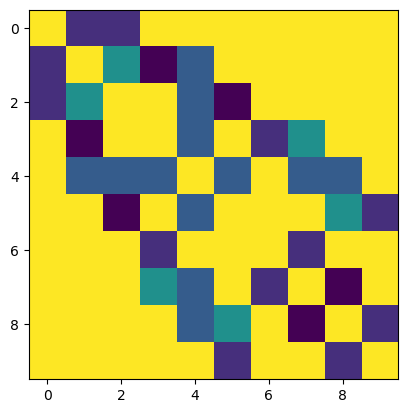

In [24]:
N = M = 3


A, T = basis_calc(N, M)
J = 1

#One proposal
H_01 = np.zeros((len(A), len(A)))
for i, v in enumerate(A):
    for j in range(M):
        k = (j+1) % M
        if v[j] > 0: 
            u = list(v)
            u[j] -= 1
            u[k] += 1
            H_jk = -J*np.sqrt(u[k])*np.sqrt(v[j])
            r = T[tuple(u)]
            H_01[i,r] += H_jk
        if v[k] > 0: 
            u = list(v)
            u[k] -= 1
            u[j] += 1
            H_jk = -J*np.sqrt(u[j])*np.sqrt(v[k])
            r = T[tuple(u)]
            H_01[i,r] += H_jk
    
plt.imshow(H_01)

#Another proposal
H_02 = np.zeros((len(A), len(A)))
for i, v in enumerate(A):
    for j in range(M):
        k_range = [(j-1) % M, (j+1) % M]
        for k in k_range:
            if v[k] > 0: 
                u = list(v)
                u[k] -= 1
                u[j] += 1
                H_jk = -J*np.sqrt(u[j])*np.sqrt(v[k])
                r = T[tuple(u)]
                H_02[i,r] += H_jk

print('Difference:')
print(H_01-H_02)

Again, this is not very efficient in memory as there are a lot of zeros in the matrix. We shall rewrite the tunnelling Hamiltonian using a sparse matrix instead.

__Exercise:__
    
Write two functions that depend on $J, U, N, M$ and a given basis which yield the interaction and tunnelling Hamiltonians as ``scipy.sparse.csc_array`` objects.

_Tip: use the ``.tocsc()`` method to transform the ``dia_array`` into a ``csc_array``. Use the fourth construction method in https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_array.html to build the tunnelling sparse matrix._

_Suggestion: you can avoid passing the N, M parameters since the basis already has fixed N, M. How can you obtain them?_

In [25]:
# Write your code here























__Example solution:__

In [26]:
def H_int(U, basis):
    A, T = basis
    M = len(A[0])
    N = sum(A[0])
    D = len(A)
    diag = []
    for i, v in enumerate(A):
        diag.append(U/2*sum([n*(n-1) for n in v]))
    H_int = sparse.dia_array((diag, 0), (D,D))
    
    return H_int.tocsc()

def H_0(J, basis):
    A, T = basis
    M = len(A[0])
    N = sum(A[0])
    D = len(A)
    data, row, col = [], [], []
    for i, v in enumerate(A):
        for j in range(M):
            k_range = [(j-1) % M, (j+1) % M]
            for k in k_range:
                if v[k] > 0: 
                    u = list(v)
                    u[k] -= 1
                    u[j] += 1
                    H_jk = -J*np.sqrt(u[j])*np.sqrt(v[k])
                    r = T[tuple(u)]
                    data.append(H_jk)
                    row.append(i)
                    col.append(r)
    
    return sparse.csc_array((data, (row, col)), shape = (D, D))

N = M = 3
basis = basis_calc(N, M)
H = H_int(1, basis) + H_0(1, basis)

print(H)    

  (0, 0)	3.0
  (1, 0)	-1.7320508075688772
  (2, 0)	-1.7320508075688772
  (0, 1)	-1.7320508075688772
  (1, 1)	1.0
  (2, 1)	-1.0
  (3, 1)	-2.0000000000000004
  (4, 1)	-1.4142135623730951
  (0, 2)	-1.7320508075688772
  (1, 2)	-1.0
  (2, 2)	1.0
  (4, 2)	-1.4142135623730951
  (5, 2)	-2.0000000000000004
  (1, 3)	-2.0000000000000004
  (3, 3)	1.0
  (4, 3)	-1.4142135623730951
  (6, 3)	-1.7320508075688772
  (7, 3)	-1.0
  (1, 4)	-1.4142135623730951
  (2, 4)	-1.4142135623730951
  (3, 4)	-1.4142135623730951
  (5, 4)	-1.4142135623730951
  (7, 4)	-1.4142135623730951
  (8, 4)	-1.4142135623730951
  (2, 5)	-2.0000000000000004
  (4, 5)	-1.4142135623730951
  (5, 5)	1.0
  (8, 5)	-1.0
  (9, 5)	-1.7320508075688772
  (3, 6)	-1.7320508075688772
  (6, 6)	3.0
  (7, 6)	-1.7320508075688772
  (3, 7)	-1.0
  (4, 7)	-1.4142135623730951
  (6, 7)	-1.7320508075688772
  (7, 7)	1.0
  (8, 7)	-2.0000000000000004
  (4, 8)	-1.4142135623730951
  (5, 8)	-1.0
  (7, 8)	-2.0000000000000004
  (8, 8)	1.0
  (9, 8)	-1.7320508075688772


## Hamiltonian diagonalization

There is a good amount of algorithms to solve the general eigenvalue problem, most of them being variants of the Lanczos algorithm, so we can simply make use of libraries that implement such algorithms to diagonalize the Hamiltonian. Moreover, we are dealing with symmetric and Hermitian matrices so we can use a particular algorithm made for those.

In this case we will rely on the [`eigsh`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.eigsh.html) function from the `scipy.sparse.linalg` library. There is an equivalent function in [`numpy.linalg.eigh`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html), of course. When we diagonalize said Hamiltonian we can get the eigenvalues and corresponding eigenstates in the basis we have defined to write our Hamiltonian matrix.

Sadly, we can't compute all the eigenvalues for sparse matrices due to the algorithm reasons but we can do it for the `numpy` dense matrices. In most cases we only want the ground state so the sparse methods are sufficient.

__Exercise:__

Compute the Bose-Hubbard Hamiltonian for a system with $N = 4$ bosons and $M = 2$ sites and parameters $J = 5, U = .2$ using the functions we defined in the previous exercise and all eigenstates with their corresponding eigenvalues using `np.linalg.eigh`.  Use the `scipy.sparse` method `.todense()` to  turn your sparse array into a `numpy` array.

In [27]:
# Write your code here























__Example solution:__

In [28]:
N = 4
M = 2
basis = basis_calc(N, M)
H = H_int(.2, basis) + H_0(5, basis)
H = H.todense()
w, v = np.linalg.eigh(H)
for wi, vi in zip(w, v.T):
    print(wi, vi)

-39.401485121490964 [-0.24628731 -0.49998153 -0.61540398 -0.49998153 -0.24628731]
-19.102249873451726 [ 4.96236256e-01  5.03735623e-01 -1.51546765e-16 -5.03735623e-01
 -4.96236256e-01]
0.9999699992504255 [ 0.61231885  0.00612411 -0.50005624  0.00612411  0.61231885]
20.90224987345173 [ 5.03735623e-01 -4.96236256e-01 -1.43963343e-16  4.96236256e-01
 -5.03735623e-01]
40.60151512224053 [-0.25378769  0.49998097 -0.60927965  0.49998097 -0.25378769]


__Exercise:__

Repeat the same exercise but now only compute two eigenvalues and eigenstates using `sparse.linalg.eigsh`. Print the ground state and it's corresponding energy.

In [29]:
# Write your code here























__Example solution:__

In [30]:
N = 4
M = 2
basis = basis_calc(N, M)
H = H_int(.2, basis) + H_0(5, basis)
w, v = sparse.linalg.eigsh(H, k = 1, which = 'SA')
print(w[0], v[:,0])

-39.40148512149094 [0.24628731 0.49998153 0.61540398 0.49998153 0.24628731]


## Expectation value of an observable

To compute an observable in quantum mechanics for an operator $\hat{A}$ we have to calculate

$$ \left< \hat{A} \right> = \left< \Psi \right| \hat{A} \left| \Psi \right> = \sum_{j,l}c_j^* c_l \left<\psi_j\right| \hat{A}_{j,l} \left| \psi_l \right>,$$

which in the end can be seen as a vector-matrix-vector product. 

__Exercise:__

- Define an `expectation_value` function that calculates the expectation value given a wave function in array form and an observable in matrix form. Use the `A.dot(B)` method to calculate the dot product between `A` and `B` and the `np.conj()` function to calculate the complex conjugate of a vector.
- Check that the ground state indeed has the Energy obtained in the previous exercise by calculating $E_{0} = \left<G\right|\hat{H}\left|G\right>$ where $\left|G\right>$ is the ground state.

In [31]:
# Write your code here























In [32]:
def expectation_value(wf, A):
    return np.conj(wf).dot(A.dot(wf))

gs = v[:, 0]
expectation_value(gs, H)

-39.40148512149095

## Single-particle density matrix (SPDM)

Let us calculate the so called single-particle density matrix which we will use later to calculate the condensate fraction.

The single-particle density matrix elements are given by:

$$\rho_{ij}^{(1)} = \left< G \right| \hat{a}^\dagger_i \hat{a}_j \left| G \right>,$$

where $ 1 \le i,j \le M$ are the lattice sites of our optical lattice. So we  can define an operator $\hat{\rho}_{ij} = \hat{a}^\dagger_i \hat{a}_j$ in matrix form with respect to our Fock basis, calculate the expectation value for the ground state of $\hat{H}_{BH}$ and build the full $M\times M$ matrix.

In general, the SPDM is Hermitian, semi-positive-definite and of trace equal to the particle
number. In the present case, the SPDM is subjected to more constraints which makes it real, symmetric and cyclic.

__Exercise:__

- Create a function `rho_ij` that takes the arguments `i, j, basis` and construct the single particle density matrix elements
- Calculate a Fock basis with $N=6, M=5$.
- Find the ground state of the Bose Hubbard Hamiltonian when $J = 0.5, U = 0.5$
- Calcutate the expectation value of `rho_ij` for $i=1, j=2$ for the ground state. 
- Build the full SPDM for this particular example.

In [33]:
# Write your code here























__Example solution:__

In [34]:
def rho_ij(i, j, basis):
    A, T = basis
    D = len(A)
    data, row, col = [], [], []
    for k, v in enumerate(A):
        if v[j] > 0:
            u = list(v)
            u[j] -= 1
            u[i] += 1
            data.append(np.sqrt(u[i])*np.sqrt(v[j]))
            row.append(k)
            r = T[tuple(u)]
            col.append(r)
            
    return sparse.csc_array((data, (row, col)), shape = (D, D))

N = 6
M = 5
basis = basis_calc(N, M)
H = H_0(.5, basis)+H_int(.5, basis)
w, v = sparse.linalg.eigsh(H, k = 1, which = 'SA')
gs = v[:, 0]

rho1 = np.zeros((M,M))
for i in range(M):
    for j in range(M):
        rho = rho_ij(i, j, basis)
        rho1[i,j] = expectation_value(gs, rho)
        
print(rho1)

[[1.2        1.17183866 1.15096305 1.15096305 1.17183866]
 [1.17183866 1.2        1.17183866 1.15096305 1.15096305]
 [1.15096305 1.17183866 1.2        1.17183866 1.15096305]
 [1.15096305 1.15096305 1.17183866 1.2        1.17183866]
 [1.17183866 1.15096305 1.15096305 1.17183866 1.2       ]]


## Condensate fraction

According to the Penrose–Onsager criterion, a condensate is present if and only if the largest eigenvalue $\lambda_1$ of $\rho^{(1)}$ is macroscopic, i.e. $f_c = \lambda_1/N$ is on the order of unity and the
ratio $f_c$ is called the condensate fraction.

We can of course obtain this eigenvalue by diagonalizing the SPDM numerically but for our particular case due to the symmetries of the matrix we also have

$$ \lambda_1 = \sum_j \rho_{0j}^{(1)}.$$

What we are going to do now is to plot the condensate fraction for different values of $U/J, N/M$ in order to see the transition from the Mott insulator regime to the superfluid.

__Exercise:__

- For the given parameters in the next cell, calculate the condensate fraction of the Bose Hubbard model with respect to parameters $J/U$ and $N/M$ and plot it on a 2D image using `plt.pcolormesh`. 

In [35]:
U = 1
J_range = np.linspace(0, .5*U, 20)
M = 5
N_range = np.arange(1, 3*M)

# Write your code here























__Example solution:__

In [36]:
U = 1
J_range = np.linspace(0, .5*U, 20)
M = 5
N_range = np.arange(1, 3*M)

f_c = np.empty((len(N_range), len(J_range)))

for i, N in enumerate(N_range):
    basis = basis_calc(N, M)
    for j, J in enumerate(J_range):
        H = H_0(J, basis)+H_int(U, basis)
        w, v = sparse.linalg.eigsh(H, k = 1, which = 'SA')
        gs = v[:, 0]

        lambda_1 = 0
        for k in range(M):
            rho = rho_ij(0, k, basis)
            lambda_1 += expectation_value(gs, rho)
        
        f_c[i, j] = lambda_1/N

Text(0, 0.5, 'N/M')

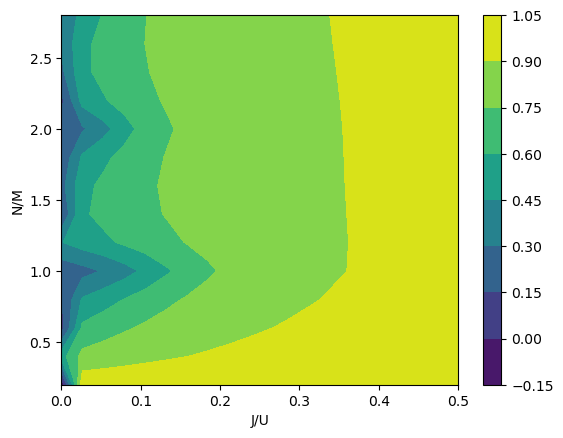

In [37]:
#plt.pcolormesh(J_range/U, N_range/M, f_c)
plt.contourf(J_range/U, N_range/M, f_c)
plt.colorbar()
plt.xlabel('J/U')
plt.ylabel('N/M')

## Occupation Variance

An alternative observable that would show us the MI-SF transition is the occupation variance, which can be computed as 

$$
\sigma_i = \sqrt{\left<G\right| \hat{n}_i^2 \left|G\right> - \left<G\right| \hat{n}_i \left|G\right>^2}
.
$$

__Exercise:__

- For the given parameters in the next cell, calculate the occupation variance for an arbitrary site of the Bose Hubbard model with respect to parameters $J/U$ and $N/M$ and plot it on a 2D image using `plt.pcolormesh`. 

In [38]:
U = 1
J_range = np.linspace(0, .5*U, 20)
M = 5
N_range = np.arange(1, 3*M)

# Write your code here























__Example solution:__

In [40]:
U = 1
J_range = np.linspace(0, .5*U, 20)
M = 5
N_range = np.arange(1, 3*M)

sigma = np.empty((len(N_range), len(J_range)))

def n_i(i, basis):
    diag = []
    A, T = basis
    D = len(A)
    for v in A:
        diag.append(v[i])
    return sparse.dia_array((diag, 0), (D,D)).tocsc()

def sigma_i(wf, basis, i):
    n = n_i(i, basis)
    return np.sqrt(expectation_value(wf, n**2) - expectation_value(wf, n)**2)

site = 0
for i, N in enumerate(N_range):
    basis = basis_calc(N, M)
    for j, J in enumerate(J_range):
        H = H_0(J, basis)+H_int(U, basis)
        w, v = sparse.linalg.eigsh(H, k = 1, which = 'SA')
        gs = v[:, 0]
        
        sigma[i, j] = sigma_i(gs, basis, site)

Text(0, 0.5, 'N/M')

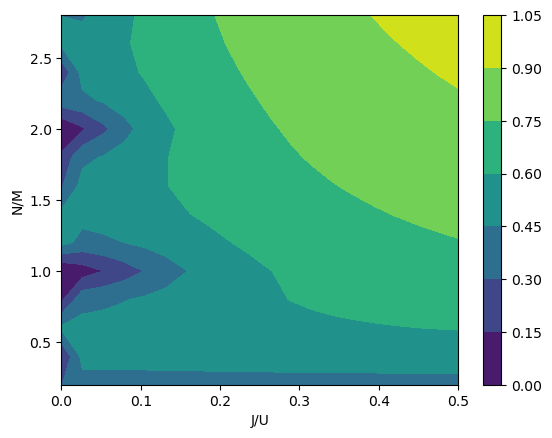

In [43]:
#plt.pcolormesh(J_range/U, N_range/M, f_c)
plt.contourf(J_range/U, N_range/M, sigma)
plt.colorbar()
plt.xlabel('J/U')
plt.ylabel('N/M')